# SciPy

## Contents

  - [Overview](#Overview)
  - [SciPy versus NumPy](#SciPy-versus-NumPy)  
  - [Statistics Subpackage](#Statistics)  

## Overview

[SciPy](http://www.scipy.org) builds on top of NumPy to provide common tools for scientific programming, such as

- [linear algebra](http://docs.scipy.org/doc/scipy/reference/linalg.html)  
- [numerical integration](http://docs.scipy.org/doc/scipy/reference/integrate.html)  
- [interpolation](http://docs.scipy.org/doc/scipy/reference/interpolate.html)  
- [optimization](http://docs.scipy.org/doc/scipy/reference/optimize.html)  
- [distributions and random number generation](http://docs.scipy.org/doc/scipy/reference/stats.html)  
- [signal processing](http://docs.scipy.org/doc/scipy/reference/signal.html)  
- etc., etc  

Like NumPy, SciPy is stable, mature and widely used. 
Many SciPy routines are thin wrappers around industry-standard Fortran libraries such as LAPACK, BLAS, etc.

It’s not really necessary to “learn” SciPy as a whole. 
A more common approach is to get some idea of what’s in the library and then look up [documentation](http://docs.scipy.org/doc/scipy/reference/index.html) as required.

## SciPy versus NumPy

SciPy is a package that contains various tools that are built on top of NumPy, using its array data type and related functionality.

In fact, when we import SciPy we also get NumPy. 
However, it’s more common and better practice to use NumPy functionality explicitly.

In [1]:
import numpy as np

a = np.identity(3)

print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


What is useful in SciPy is the functionality in its subpackages

- `scipy.optimize`, `scipy.integrate`, `scipy.stats`, etc.  

These subpackages and their attributes need to be imported separately. 

For example: `from scipy.integrate import quad`, `from scipy.optimize import brentq`, `from scipy.stats import norm`, etc

## Statistics

The `scipy.stats` subpackage supplies

- numerous random variable objects (densities, cumulative distributions, random sampling, etc.)  
- some estimation procedures  
- some statistical tests  

### Random Variables and Distributions

Recall that `numpy.random` provides functions for generating random variables.

In [ ]:
np.random.beta(5, 5, size=3)

This generates a draw from the beta distribution below when `a, b = 5, 5`

$$
f(x; a, b) = \frac{x^{(a - 1)} (1 - x)^{(b - 1)}}
    {\int_0^1 u^{(a - 1)} (1 - u)^{(b - 1)} du}
    \qquad (0 \leq x \leq 1) \tag{1}
$$

Sometimes we need access to the density itself, or the cdf, the quantiles, etc.
For this we can use `scipy.stats`, which provides all of this functionality as well as random number generation in a single consistent interface.

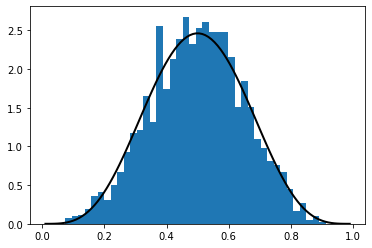

In [3]:
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In this code we created a so-called `rv_frozen` object, via the call `q = beta(5, 5)`.

`q` represents a particular distribution with a particular set of parameters. It has additional useful methods, including

In [ ]:
q.cdf(0.4)      # Cumulative distribution function

In [ ]:
q.pdf(0.4)      # Density function

In [ ]:
q.ppf(0.8)      # Quantile (inverse cdf) function

In [ ]:
q.mean()

The general syntax for creating these objects is

> `identifier = scipy.stats.distribution_name(shape_parameters, loc=c, scale=d)`

where `distribution_name` is one of the distribution names in [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html).
The keyword arguments, `loc` and `scale`, transform the original random variable $ X $ into $ Y = c + d X $. 

Note that there is an alternative way of calling the methods described above. 
For example, the previous code can be replaced by:

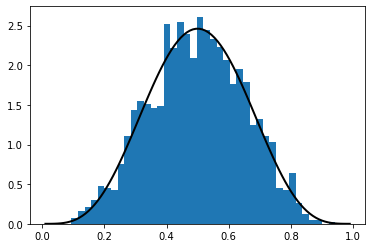

In [8]:
obs = beta.rvs(5, 5, size=2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2)
plt.show()